## <center>An Exercise in Optimization 



General steps that anyone follows when they face a problem is first they try to understand what the problem is. Then try and design a solution, if its in programming then write a pseudo code then code, test and then debug. 
<p>In this exercise, the problem is the Taylor series, we already know the solution i.e., expression of different functions in the form of Taylor Series. What we will be focusing on is the optimization of these functions that calculate the value of different mathematical functions using taylor series. You will see how each optimization affects the performance and does it affect the accuracy which in other words is testing of the function. I will also try and visualize the data as much as possible to give a better understanding of what is going on.

Before we begin with the exercise lets brush up our knowledge of <b>Taylor Series

### Taylor Series
<p>A Taylor Series is an expansion of a function into an infinite sum of terms, with increasing exponents of a variable. Any continuous function can be expressed as Taylor Series. To know more about Taylor Series click 
    <a href='https://en.wikipedia.org/wiki/Taylor_series'>here</a>.
<p>In this exercise we will be looking at the following functions

#### The geometric series  $\frac{1}{(1-x)}$
<br>$$\frac{1}{(1-x)} = \sum_{k=0}^{\infty} x^n = 1 + x + x^2 + x^3 + \dots$$ 

#### The exponential function $e^x$
<br>$$e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots$$ 


#### The Trigonometric functions
$$\sin x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n + 1)!}x^{(2n+1)} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots$$
<br>
$$\cos x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{(2n)} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \dots$$

***

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

***
<p>Lets begin with 

### <center>The geometric series 
<br>$$\frac{1}{(1-x)} = \sum_{k=0}^{\infty} x^n = 1 + x + x^2 + x^3 + \dots$$ 
<br>This holds true when $|x| < 1$

Since the value of $|x| < 1$ and the power goes on increasing, the series converges. This means that the end terms approximate to zero. The graph below is for $0.7$ from its $0^{th}$ to $20^{th}$ power. Look at how the term is converging as the power is increasing.

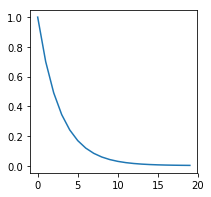

In [2]:
a = 0.7
l = []
for i in range(0,20) :
    l.append(math.pow(a,i))

fig, ax = plt.subplots(1,1,figsize=(3,3))
ax.plot(l)
    

Taylor Series is an infinite series but we can't run our loop forever, so we can keep the terminating condition such that we stop when we arrive at a term which equals zero. 

In [2]:
%%timeit
def gpsum(a):
    s = 0
    i = 0
    b = 1
    while(b != 0):
        s = s + pow(a,i)
        i = i + 1
        b = pow(a,i)
gpsum(0.5)

536 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Python provides another way to find the power of a given number

In [3]:
%%timeit
def gpsum(a):
    s = 0
    i = 0
    b = 1
    while(b != 0):
        s = s + a**i
        i = i + 1
        b = pow(a,i)
gpsum(0.5)

508 µs ± 31.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
def gpsum(a):
    s = 0
    i = 0
    b = 1
    while(b != 0):
        s = s + a**i
        i = i + 1
        b = pow(a,i)
    return s, i 

The functions returns a value of data type float, there are 53 bits of precision available for python float.
<br>The terminating condition for our loop calls for extra iterations to equate or term to $0$ till the last precision. What if we set a precision limit ? Let's see how it affects the number of iterations.


<p>This will be our first case of Optimization
<br><b>1] Set a precision limit to reduce the number of iterations

In [5]:
%%timeit
def pow_sum_limit(a):
    s = 0
    count = 0
    t = 1 
    while t > 0.00001 :
        t = a**count
        s = s + t
        count += 1
    return s

pow_sum_limit(0.5)

3.9 µs ± 104 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<center><b>This change simply made it $120\times$ faster ! 

In [6]:
def pow_sum_limit(a):
    s = 0
    count = 0
    t = 1 
    while t > 0.00001 :
        t = a**count
        s = s + t
        count += 1
    return s, count

Below is a function that will plot the number of iterations taken by the two functions and also plot another graph with that value of the sum along with respective value of $\frac {1}{1-x}$

In [15]:
a = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

def compare_functions(func1,func2):
    itr1 = []
    itr2 = []
    actual = []
    ans1 = []
    ans2 = []
    for i in a :
        tup1 = func1(i)
        tup2 = func2(i)
        itr1.append(tup1[1])
        itr2.append(tup2[1])
        ans1.append(tup1[0])
        ans2.append(tup2[0])
        actual.append(1/(1-i))    
    fig, ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].plot(a,itr1, color = 'red')
    ax[0].plot(a,itr2)
    ax[0].legend([func1.__name__+"()", func2.__name__+"()"])
    ax[0].set_title("Iterations")
    ax[0].set_ylabel("No.of Iterations")
    ax[0].set_xlabel("$x$")
    ax[1].plot(a, ans1, color = 'red')
    ax[1].plot(a, ans2)
    ax[1].plot(a, actual)
    ax[1].legend([func1.__name__+"()",func2.__name__+"()","${1}/{(1-x)}$"])
    ax[1].set_title("Values of geometric series")

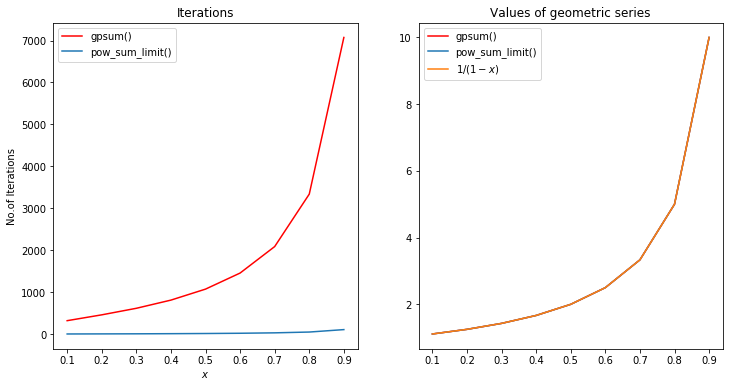

In [16]:
compare_functions(gpsum,pow_sum_limit)

In [50]:
print(gpsum(0.9))
print(pow_sum_limit(0.9))

(9.999999999999993, 7073)
(9.999916647515818, 111)


We can see that for $0.9$, the naive implementation takes near about 7000 iterations whereas when we set a limit the number of iterations do not even reach 1000. The second graph shows the actual values calculated by both of the functions and the value of $\frac {1}{1-x}$, the three of them superimpose, which says that the two functions are quite accurate but by simply setting a limit we can reduce the number of iterations by 7000 and get a speedup of $120\times $.


<p>Lets optimize it further.
<p>In the above functions we are calculating $a^i$ at every iteration. We don't need to do that, since at one iteration we've calculated the value of $a^i$ at the next iteration we can just multiply that value by $a$. It would go something like this 
<br>$a$
<br>$(a)\cdot a$
<br>$(a\cdot a)\cdot a$
<br>$(a\cdot a\cdot a)\cdot a$
<br>$\dots$
<p>Second case of optimization
    <br><b>2] Replacing the pow() / ** function.

In [57]:
%%timeit
def pow_sum_limit1(a):
    s = 0
    t = 1
    while t > 1e-5 :
        t = t*a
        s += t
    return s
pow_sum_limit(0.5)

1.55 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


<center><b> We get a speed up of $300\times$

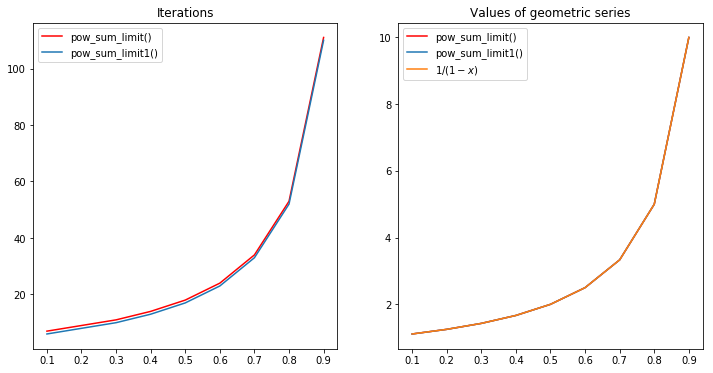

In [91]:
def pow_sum_limit1(a):
    s = 1
    t = 1
    count = 0 
    while t > 0.00001 :
        t = t*a
        s = s + t
        count += 1
    return s, count

compare_functions(pow_sum_limit,pow_sum_limit1)

We see that there is a slight difference in the number of iterations taken by our recent functions, that is because we enter the loop with value of $s$ initialized to 1 rather than 0, which saves our 1 iteration.


To summarize what we did in the geometric series
<ul>
    <li>We started off with a naive implementation where is go on iterating till we find a term that is equal to $0$.</li> 
    <li>To avoid those extra iterations we set a precision limit to our loop which gave us a speed up of <b>120x</b></li>
    <li>Then instead of calculating the exponential term for every iteration, we used the value produced in our previous       iteration and multiplied it with 'a'. Which gave us a speedup of <b>300x</b>.</li>
    </ul>

***

Till now we have seen two ways to optimize our function that calculates the sum of the geometric series. We will move on to the exponential function and perform similar optimization.

***

### <center>The exponential function $e^x$
<br>$$e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots$$ 

Looking at the series we observe that there is factorial in every term which was not present in the geometric series. Python provides a math.factorial(x) function that calculates the factorial of x. Can we replace it the same way we replaced the pow() function in our geometrix series ? 
<p> We also wrote a testing function for geometric series in which we compare the no.of iterations and also cross the sum of the series with $\frac {1}{1-x}$. Similarly we need to write a testing function for our exponential function and trigonometric functions.
    <br>Therefore we need to write a <b>generic testing funcition</b> that can test our functions for accuracy. We want to optimize our functions but also keep the correctness of it.
<p>Lets list down the tasks we need to perform for this function.
<ul>
    <li> Set a terminating condition such that you can avoid unnecessary iterations. </li>
    <li> Replace the power function, math.pow(). </li>
    <li> Find a way to replace math.fact() in a similar way we did for pow().</li>
    <li> Put all of these together and see what resut you get.
</ul>

***

<b><center> The Testing function</center></b>

This is a generic testing function that can be used for testing all the Taylor series operations that we will be performing in this notebook. We will test them against inbuilt python functions for $e^x$, $\sin$, and $\cos$. We need to write a function that will calculate the sum of geometric series according to the formula $\frac{1}{1-x}$.

In [10]:
def gs(x):
    return (1/(1-x))

In [51]:

def test(func1,func2) :
    
    if func1.__name__ == "cal_sine_cosine" :
        angle = np.linspace(0, 2* np.pi  ,num = 100 , endpoint=False)
    #------------------ for cos --------------------------------------
        cosx = []
        actualcos = []
        error = []
        #finding cos and math.cos for every angle in the list
        for i in angle :
            cosofx = func1(i,0)[0]
            actualcosofx = func2(i)
            cosx.append(cosofx)
            actualcos.append(actualcosofx)
            error.append(round((actualcosofx - cosofx),7))
            
        #plotting graph for userdefines and math.cos
        fig, ax = plt.subplots(2,2,figsize=(10,10))
        ax[0][0].plot(cosx, color = 'red')
        ax[0][0].set_title("cal_sine_cosine(x,0)")
        ax[0][1].plot(actualcos)
        ax[0][1].set_title("math.cos(x)")
        ax[1][0].plot(cosx, color = 'red')
        ax[1][0].plot(actualcos)
        ax[1][0].legend(['cal_sine_cosine(x,0)', 'math.cos(x)'])
        ax[1][0].set_title("Superimposition of cal_sine_cosine(x,0) and math.cos(x)")
        ax[1][1].plot(error)
        ax[1][1].set_title("error")
        
    #------------------ for sin --------------------------------------
        sinx = []
        actualsin = []
        error = []
        
        #finding sin and math.sin for all values in list - angle
        for i in angle :
            sinofx = func1(i,1)[0]
            actualsinofx = func2(i)
            sinx.append(sinofx)
            actualsin.append(actualsinofx)
            error.append(round((actualsinofx - sinofx),7))
            
        #plotting graph for user defined function and math.sin
        fig, ax = plt.subplots(2,2,figsize=(10,10))
        ax[0][0].plot(sinx, color = 'red')
        ax[0][0].set_title("cal_sine_cosine(x,1)")
        ax[0][1].plot(actualsin)
        ax[0][1].set_title("math.sin(x)")
        ax[1][0].plot(sinx, color = 'red')
        ax[1][0].plot(actualsin)
        ax[1][0].legend(['cal_sine_cosine(x,1)', 'math.sin(x)'])
        ax[1][0].set_title("Superimposition of cal_sine_cosine(x,1) and math.sin(x)")
        ax[1][1].plot(error)
        ax[1][1].set_title("error")

    #---------- For geometric progression -------------------
    elif func2.__name__ == "gs" :
        testcase = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
        actual = []
        ans1 = []
        error = []
        for i in a :
            tup1 = func1(i)
            actualans = func2(i)
            ans1.append(tup1[0])
            actual.append(actualans)
            error.append(actualans - tup1[0])
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        ax[0].plot(a,ans1, color = 'red')
        ax[0].plot(a,actual)
        ax[0].legend([func1.__name__+"()", func2.__name__+"()"])
        ax[0].set_title(func1.__name__+"() and $\frac{1}{1-x}$")
        ax[0].set_xlabel("$x$")
        ax[1].plot(a, error, color = 'red')
        ax[1].set_title("Error")
        ax[1].set_xlable("$x$")
        
        
    # ------------------- for exponential function ----------------
    elif func2.__name__ == "math.exp" :
        x = np.linspace(20, 70,num = 50,endpoint=False)
        ourvalues = []
        actualvalues = []
        error = []
        for i in x :
            o = round(func1(i)[0],7)
            a = round(func2(i),7)
            ourvalues.append(o)
            actualvalues.append(a)
            error.append(a-o)
        fig, ax = plt.subplots(2,2,figsize=(10,10))
        ax[0][0].plot(ourvalues, color = 'red')
        ax[0][0].set_title(func1.__name__ + "()")
        ax[0][1].plot(actualvalues)
        ax[0][1].set_title(func2.__name__+"()")
        ax[1][0].plot(ourvalues,color = 'red')
        ax[1][0].plot(actualvalues)
        ax[1][0].legend([func1.__name__ + "()", func2.__name__+"()"])
        ax[1][0].set_title("Superimposition of "+func1.__name__ + "()" +" and "+ func2.__name__+"()")
        ax[1][1].plot(error)
        ax[1][1].set_title("error")

***

<center><b>Optimizing the Exponential function

<b>1] Finding the terminating condition </b>
<p>Lets plot a graph and see how series looks like for $e^2$.

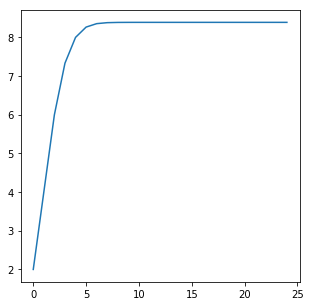

In [53]:
e = 1 
i = 0
l = []
while i < 25 :
    e += 2**i/math.factorial(i)
    i = i + 1
    l.append(e)
    
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(l)

We observe that after a certain no.of iterations the value of sum does not change, so lets keep this as our terminating condition.

In [54]:
 %%timeit
def e_pow(x):
    e_to_2 = 0
    t1 = 1
    t2 = 0
    i  = 0 
    while True:
        e_to_2 += x**i/math.factorial(i)
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2

e_pow(5)

28 µs ± 716 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Testing our function for correctness 

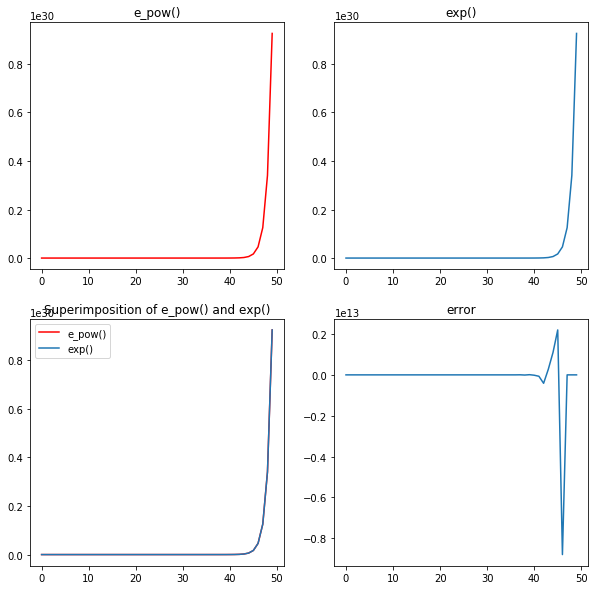

In [40]:
def e_pow(x):
    e_to_2 = 0
    t1 = 1
    t2 = 0
    i  = 0 
    while True:
        e_to_2 += x**i/math.factorial(i)
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2,i
test(e_pow,math.exp)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

As discussed earlier, python's floating point has 52 bit precision. We will set a precision limit to reduce the number of iterations.

In [61]:
def e_pow1(x):
    e_to_2 = 1
    t1 = 1
    t2 = 1
    i  = 1 
    term = 1
    fact = 1
    count = 0
    while t1 > 1e-5:
        count +=1
        term *= x
        fact *= i
        t1 = term/fact
        e_to_2 += t1
        i = i + 1
    return e_to_2, i

Since we would be checking no.of iterations quite often lets make a generic function to compare no.of iterations of two functions.

In [62]:
def compiter(func1, func2) : 
    itr1 = []
    itr2 = []
    actual = []
    ans1 = []
    ans2 = []
    for i in a :
        tup1 = func1(i)
        tup2 = func2(i)
        itr1.append(tup1[1])
        itr2.append(tup2[1])    
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    ax.plot(a,itr1, color = 'red')
    ax.plot(a,itr2)
    ax.legend([func1.__name__+"()", func2.__name__+"()"])
    ax.set_title("Iterations")
    ax.set_ylabel("No.of Iterations")
    ax.set_xlabel("$x$")

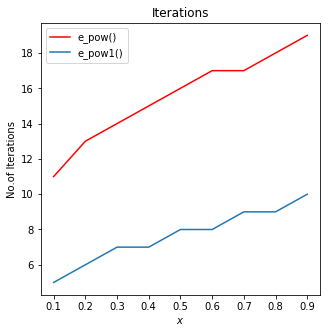

In [63]:
compiter(e_pow,e_pow1)

In [12]:
%%timeit
def e_pow(x):
    e_to_2 = 1
    t1 = 1
    t2 = 1
    i  = 1 
    term = 1
    fact = 1
    while True:
        term *= x
        fact *= i
        e_to_2 += term/fact
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2

e_pow(5)

25 µs ± 1.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


##### We see that the compuation time has reduced by almost 61%
<br>We can set a precision limit just like we did for geometric series to reduce the number of iterations and see how it affects the computation time.
<br>Lets check the no.of iterations

In [13]:
def e_pow1(x):
    e_to_2 = 1
    t1 = 1
    t2 = 1
    i  = 1 
    term = 1
    fact = 1
    while True:
        term *= x
        fact *= i
        e_to_2 += term/fact
        t1 = t2
        t2 = e_to_2
        i = i + 1
        if t1 == t2 :
            break
    return e_to_2,i



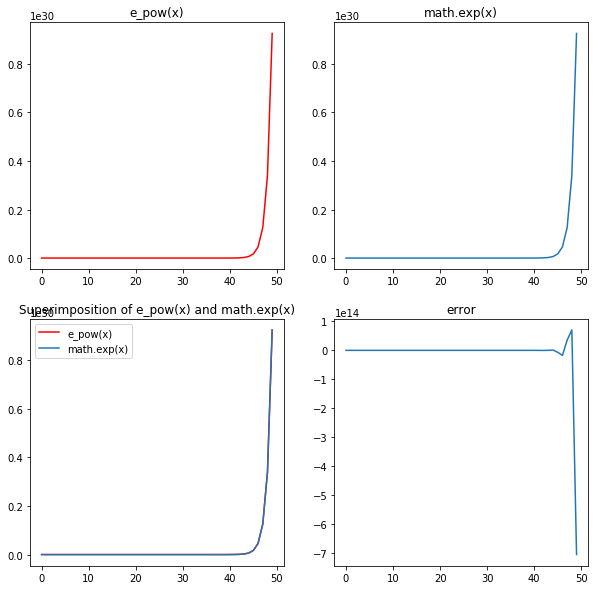

In [14]:
test(e_pow1)

In [15]:
print("No.of iterations for e^5 ", e_pow1(5)[1])
print("No.of iterations for e^2 ", e_pow1(2)[1])
print("No.of iterations for e^3 ", e_pow1(3)[1])

No.of iterations for e^5  34
No.of iterations for e^2  24
No.of iterations for e^3  28


Lets check the number of iterations after we set the precision limit

In [16]:
def e_pow2(x):
    e_to_2 = 1
    t1 = 1
    t2 = 1
    i  = 1 
    term = 1
    fact = 1
    count = 0
    while t1 > 1e-5:
        count +=1
        term *= x
        fact *= i
        t1 = term/fact
        e_to_2 += t1
        i = i + 1
    return e_to_2, i

print("No.of iterations for e^5 ", e_pow2(5)[1])
print("No.of iterations for e^2 ", e_pow2(2)[1])
print("No.of iterations for e^3 ", e_pow2(3)[1])

No.of iterations for e^5  22
No.of iterations for e^2  13
No.of iterations for e^3  17


If we set a precision limit to our very first implementation it would significantly reduce the number of iterations.

In [17]:
def e_pow4(x):
    e_to_2 = 1
    t1 = 1
    i  = 1
    while t1 >= 1e-5:
        t1 = (x**i)/(math.factorial(i))
        e_to_2 += t1
        i = i + 1
    return e_to_2,i
print("Naive implementation e^0.9",e_pow(0.9))
print("Naive implementation with precision limit e^0.9",e_pow4(0.9))

Naive implementation e^0.9 (2.45960311115695, 19)
Naive implementation with precision limit e^0.9 (2.4596030065756698, 10)


In [18]:
%%timeit
def e_pow11(x):
    e_to_2 = 1
    t1 = 1
    t2 = 1
    i  = 1 
    term = 1
    fact = 1
    while t1 > 1e-5:
        term *= x
        fact *= i
        t1 = term/fact
        e_to_2 += t1
        i = i + 1
    return e_to_2

e_pow11(5)

12.9 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### First approach took almost 67$\mu s$ and this took 14$\mu s$

What we are doing here is we are using the previously calculated exponential value multiplying it by $x$ to find the $x^k$ and similarly for factorial $k!$, our iterator is $i$, therefore we multiply our previously calculated factorial value with $i$ to get $i!$. 
<br>
<br>At every iteration we are calculating $\frac{a\cdot a\cdot a ...}{1\cdot2\cdot3...}$
<br>As the no.of iterations increase the numerator and denominator go on increasing in magnitude, we then divide these two large numbers which is relatively another big calculation. 
<br>
<br>Instead of calculating two big terms we can calculate <br><br>$\frac{k}{i}$<br><br>$(\frac{k}{i})\cdot\frac{k}{i+1}$<br><br>$(\frac{k}{i}\cdot\frac{k}{i+1})\cdot\frac{k}{i+2}$<br><br>$\dots$<br>
<br>In all of our previous approach we had initialised the value of exponential sum to zero. Since, we wont be calculating the factorial and exponential terms separately, we need to initialise the sum to 1 

In [19]:
%%timeit
def e_pow3(x):
    e_to_2 = 1
    t1 = 1
    t2 = 1
    i  = 1 
    term = 1
    fact = 1
    while t1 > 1e-5:
        t1 = t1*x/i
        e_to_2 += t1
        i = i + 1
    return e_to_2

e_pow3(5)

12.4 µs ± 2.88 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [20]:
def e_pow3(x):
    e_to_2 = 1
    t1 = 1
    t2 = 1
    i  = 1 
    term = 1
    fact = 1
    while t1 > 1e-5:
        t1 = t1*x/i
        e_to_2 += t1
        i = i + 1
    return e_to_2, i



### From 67$\mu s$ to 7$\mu s$

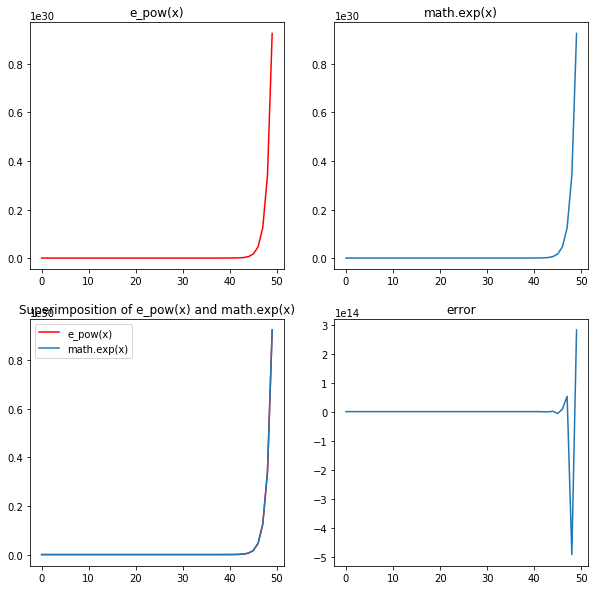

In [21]:
test(e_pow3)

Text(0,0.5,'Iterations')

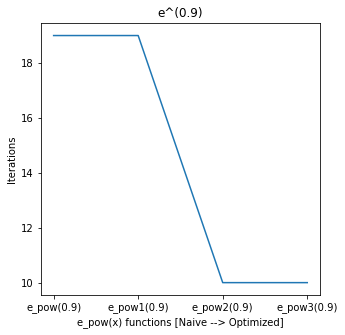

In [22]:

itr = []
itr.append(e_pow(0.9)[1])
itr.append(e_pow1(0.9)[1])
itr.append(e_pow2(0.9)[1])
itr.append(e_pow3(0.9)[1])
xaxis = ["e_pow(0.9)","e_pow1(0.9)","e_pow2(0.9)","e_pow3(0.9)"]
fig, ax = plt.subplots(1, 1, figsize = (5,5))
ax.plot(xaxis,itr)
ax.set_title("e^(0.9)")
ax.set_xlabel("e_pow(x) functions [Naive --> Optimized]")
ax.set_ylabel("Iterations")


***


### The Trigonometric Functions 
<br>

Before we proceed here is a testing function for the sine, cosine functions that we will be writing 

In [10]:
# list of angles from 0 - 2pi
angle = np.linspace(0, 2* np.pi  ,num = 100 , endpoint=False)
def testing1(func,i) :
    if i == 0 :
        cosx = []
        actualcos = []
        error = []
        
        #finding cos from userdefined function and math.cos, calculating error for all angles in the list
        for i in angle :
            cosofx = func(i)
            actualcosofx = math.cos(i)
            cosx.append(cosofx)
            actualcos.append(actualcosofx)
            error.append(round((actualcosofx - cosofx),10))
            
        #plotting graph of userdefined and math.cos values 
        fig, ax = plt.subplots(2,2,figsize=(10,10))
        ax[0][0].plot(cosx, color = 'red')
        ax[0][0].set_title("cosine(x)")
        ax[0][1].plot(actualcos)
        ax[0][1].set_title("math.cos(x)")
        ax[1][0].plot(cosx, color = 'red')
        ax[1][0].plot(actualcos)
        ax[1][0].legend(['cosine(x)', 'math.cos(x)'])
        ax[1][0].set_title("Superimposition of cosine(x) and math.cos(x)")
        ax[1][1].plot(error)
        ax[1][1].set_title("error")
    if i == 1 :
        sinx = []
        actualsin = []
        error = []
        
        #finding cos from userdefined function and math.cos, calculating error for all angles in the list
        for i in angle :
            sinofx = func(i)
            actualsinofx = math.sin(i)
            sinx.append(sinofx)
            actualsin.append(actualsinofx)
            error.append(round((actualsinofx - sinofx),10))
            
        #plotting graph of userdefined and math.cos values 
        fig, ax = plt.subplots(2,2,figsize=(10,10))
        ax[0][0].plot(sinx, color = 'red')
        ax[0][0].set_title("sin(x)")
        ax[0][1].plot(actualsin)
        ax[0][1].set_title("math.sin(x)")
        ax[1][0].plot(sinx, color = 'red')
        ax[1][0].plot(actualsin)
        ax[1][0].legend(['sin(x)', 'math.sin(x)'])
        ax[1][0].set_title("Superimposition of sin(x) and math.sin(x)")
        ax[1][1].plot(error)
        ax[1][1].set_title("error")

#### The Cosine Function
<br>
$$\cos x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{(2n)} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \dots$$


In [11]:
def cosine(x):
    cosx = 1
    t1 = 1
    sign = -1
    i = 2
    while True:
        cosx = cosx + (sign*(x**i))/math.factorial(i)
        sign = -sign
        i = i + 2
        if t1 == cosx :
            break
        t1 = cosx
    return cosx

In [12]:
print(round(cosine(1.04),2)) # 60degeree

0.51


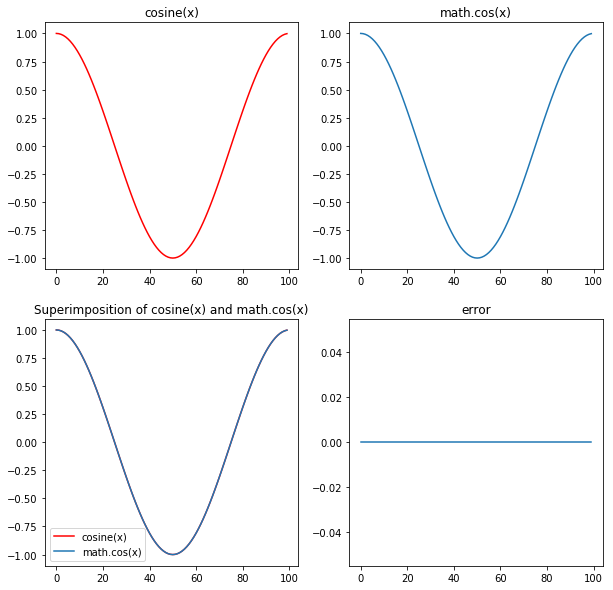

In [13]:
testing1(cosine,0)

Similarly we can write a naive implementation for finding $\sin x$


$$\sin x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n + 1)!}x^{(2n+1)} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots$$

In [14]:
def sin(x):
    t1 = i =sine = 0
    sign = -1
    while True:
        sign = -sign
        sine = sine + ((x**(2.0*i+1))/math.factorial(2*i+1))*sign
        i = i + 1
        if t1 == sine : 
            break
        t1 = sine
    return sine
print(sin(0.52))

0.4968801378437367


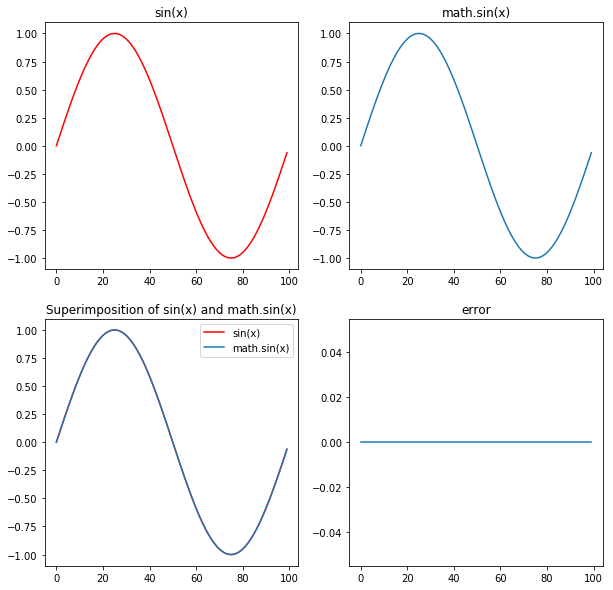

In [15]:
testing1(sin,1)

The cosine expansion consists of even powers whereas the sine expansion consists of the odd powers, we try to make a single function which can calculate both sine and cosine function
### Here is a function that calculates both sine and cosine 
We pass the indicator i = 0 for cosine and i = 1 for sine

In [16]:
%%timeit
# i = 0 == cos
# i = 1 == sin
def cal_sine_cosine(x,i) :
    t1 = val = 0
    sign = -1
    while True:
        sign  = -sign
        val = val + ((x**(i))/math.factorial(i))*sign
        i = i + 2
        if t1 == val :
            break
        t1 = val
    return val

cal_sine_cosine(np.pi/3,1)

12.5 µs ± 188 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [42]:
def cal_sine_cosine(x,i) :
    t1 = val = 0
    sign = -1
    n = 0
    while True:
        n = n + 1
        sign  = -sign
        val = val + ((x**(i))/math.factorial(i))*sign
        i = i + 2
        if t1 == val :
            break
        t1 = val
    return val, n

'''
As we move further in the series the power increases and the series converges, after a certain number of iterations the 
value of sum i.e, val does not change. For this reason we have the terminating conndition --- t1 == val 
'''

'\nAs we move further in the series the power increases and the series converges, after a certain number of iterations the \nvalue of sum i.e, val does not change. For this reason we have the terminating conndition --- t1 == val \n'

#### You can use this function to find values of $cos x$ and $sin x$ in the following way

In [18]:
def find_cos(x) :
    cal_sine_cosine(x,0)
    
def find_sin(x) :
    cal_sine_cosine(x,1)

Here is a testing function, where in you can check how correctly does your function calculate the values 
<br>As we would be performing optimizations on our functions we need to keep checking if the values calculated are correct values.

In [19]:
angle = np.linspace(0, 2* np.pi  ,num = 100 , endpoint=False)
def testing2(func,i) :
    if i == 0 :
        cosx = []
        actualcos = []
        error = []
        
        #finding cos and math.cos for every angle in the list
        for i in angle :
            cosofx = func(i,0)[0]
            actualcosofx = math.cos(i)
            cosx.append(cosofx)
            actualcos.append(actualcosofx)
            error.append(round((actualcosofx - cosofx),7))
            
        #plotting graph for userdefines and math.cos
        fig, ax = plt.subplots(2,2,figsize=(10,10))
        ax[0][0].plot(cosx, color = 'red')
        ax[0][0].set_title("cal_sine_cosine(x,0)")
        ax[0][1].plot(actualcos)
        ax[0][1].set_title("math.cos(x)")
        ax[1][0].plot(cosx, color = 'red')
        ax[1][0].plot(actualcos)
        ax[1][0].legend(['cal_sine_cosine(x,0)', 'math.cos(x)'])
        ax[1][0].set_title("Superimposition of cal_sine_cosine(x,0) and math.cos(x)")
        ax[1][1].plot(error)
        ax[1][1].set_title("error")
        
    if i == 1 :
        sinx = []
        actualsin = []
        error = []
        
        #finding sin and math.sin for all values in list - angle
        for i in angle :
            sinofx = func(i,1)[0]
            actualsinofx = math.sin(i)
            sinx.append(sinofx)
            actualsin.append(actualsinofx)
            error.append(round((actualsinofx - sinofx),7))
            
        #plotting graph for user defined function and math.sin
        fig, ax = plt.subplots(2,2,figsize=(10,10))
        ax[0][0].plot(sinx, color = 'red')
        ax[0][0].set_title("cal_sine_cosine(x,1)")
        ax[0][1].plot(actualsin)
        ax[0][1].set_title("math.sin(x)")
        ax[1][0].plot(sinx, color = 'red')
        ax[1][0].plot(actualsin)
        ax[1][0].legend(['cal_sine_cosine(x,1)', 'math.sin(x)'])
        ax[1][0].set_title("Superimposition of cal_sine_cosine(x,1) and math.sin(x)")
        ax[1][1].plot(error)
        ax[1][1].set_title("error")

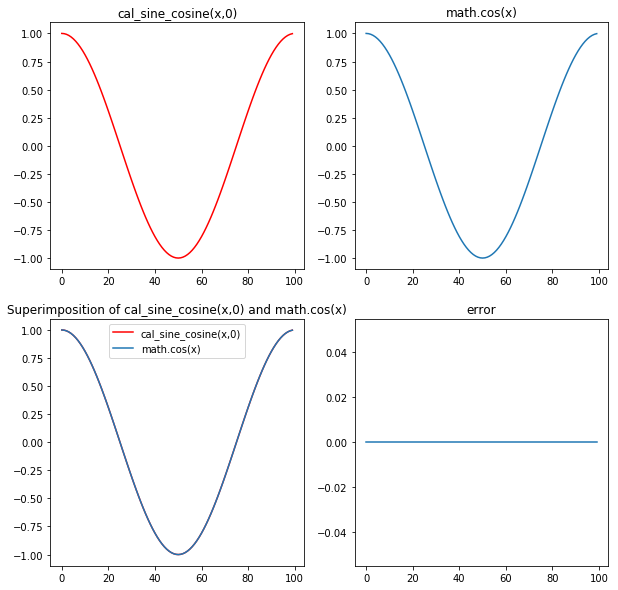

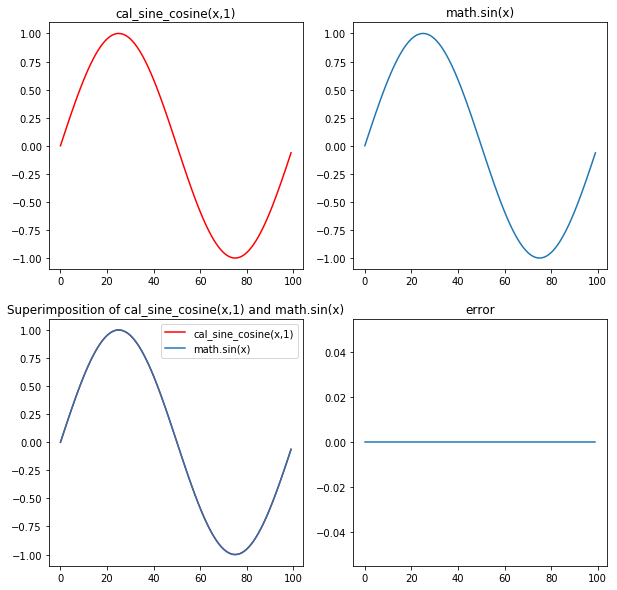

In [52]:
test(cal_sine_cosine,math.cos)

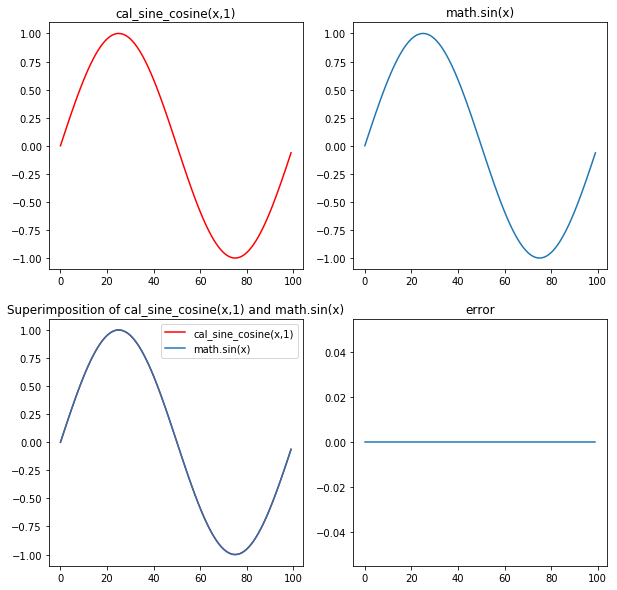

In [21]:
testing2(cal_sine_cosine,1)

<br>
Instead of using (x**i), we find the power and factorial in an efficient way and see its computing time

In [22]:
%%timeit
def cal_sine_cosine1(x,i) :
    t1 = val = 0
    sign = 1
    fact = 1
    sq = x*x
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    while True:
        term = term*sq
        fact = fact*i*(i-1)
        sign  = -sign
        val = val + (term/fact)*sign
        i = i + 2
        if t1 == val :
            break
        t1 = val
    return val

cal_sine_cosine1(np.pi/3,1)

8.64 µs ± 3.11 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Computation time has decreased from around 11$\mu s$ tp 7$\mu s$
<br>Lets see how accurate this function is 

In [23]:
def cal_sine_cosine1(x,i) :
    t1 = val = 0
    sign = 1
    fact = 1
    sq = x*x
    n = 0
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    while True:
        n = n + 1
        term = term*sq
        fact = fact*i*(i-1)
        sign  = -sign
        val = val + (term/fact)*sign
        i = i + 2
        if t1 == val :
            break
        t1 = val
    return val, n

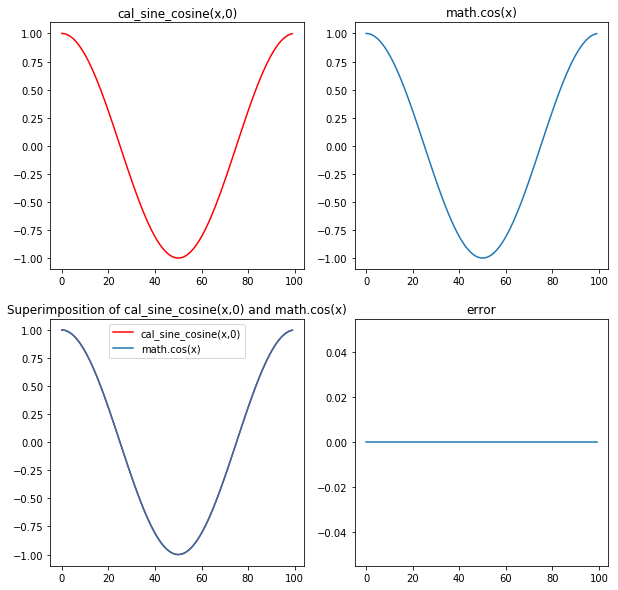

In [24]:
testing2(cal_sine_cosine1,0)

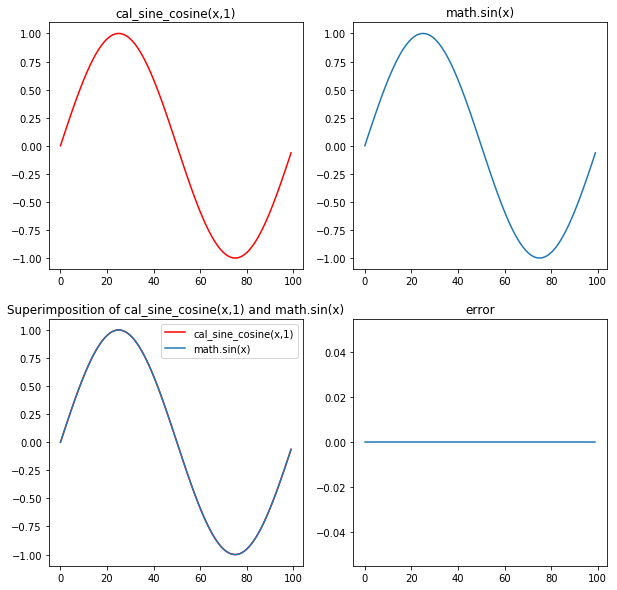

In [25]:
testing2(cal_sine_cosine1,1)

#### We can set a precision limit to reduce the no.of iterations 

In [26]:
%%timeit
def cal_sine_cosine2(x,i) :
    fact = 1
    sq = x*x
    t1 = 1
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    while abs(t1) >= 1e-5:
        term = term*sq
        fact = fact*i*(i-1)*(-1)
        t1 = (term/fact)
        val = val + t1
        i = i + 2
        
    return val

cal_sine_cosine2(np.pi/6,1)

3.11 µs ± 44.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### There is significant reduction in the computation time from 12.5 µs ± 103 ns per loop to 3$\mu s$

In [27]:
def cal_sine_cosine2(x,i) :
    fact = 1
    sq = x*x
    n = 0
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    t1 = 1
    n = 0
    while abs(t1) > 1e-5:
        n = n + 1
        term = term*sq
        fact = fact*(i*(i-1))*(-1)
        t1 = (term/fact)
        val = val + t1
        i = i + 2
    return val, n

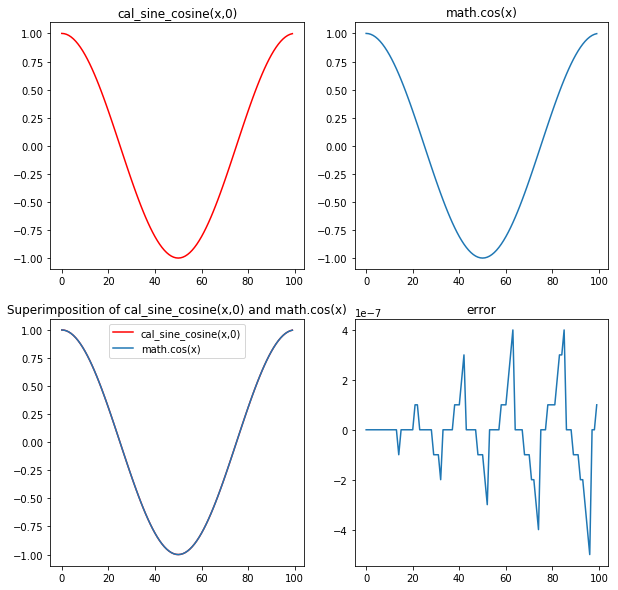

In [28]:
testing2(cal_sine_cosine2,0)

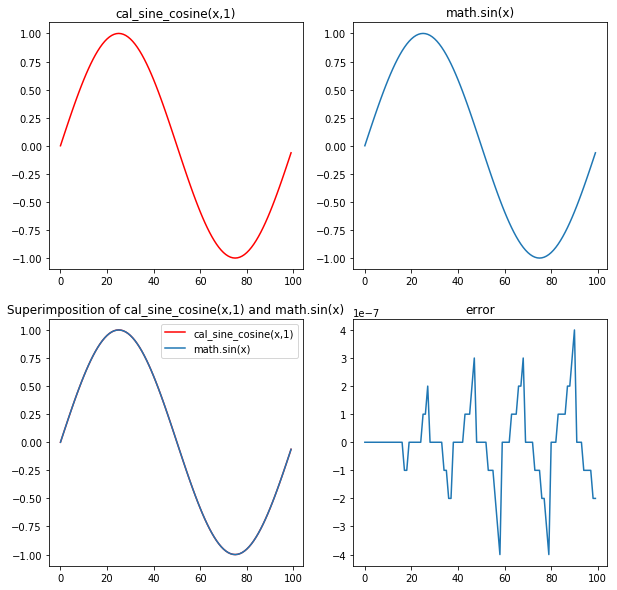

In [29]:
testing2(cal_sine_cosine2,1)


<br> We will now replace $\frac{a.a.a...}{1.2.3...}$ by 
<br><br>$\frac{k}{i}$<br><br>$(\frac{k}{i})*\frac{k}{i+1}*\frac{k}{i+2}$<br><br>$(\frac{k}{i}*\frac{k}{i+1}*\frac{k}{i+2})*\frac{k}{i+3}*\frac{k}{i+4}$<br><br>$\dots$<br>

In [30]:
%%timeit
def cal_sine_cosine3(x,i) :
    fact = 1
    sq = x*x
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    t1 = val
    while abs(t1) > 1e-5:
        t1 = t1*sq/(i*(i-1))*(-1)
        val = val + t1
        i = i + 2
    return val

cal_sine_cosine3(np.pi/6,1)

2.54 µs ± 17.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [31]:
def cal_sine_cosine3(x,i) :
    fact = 1
    sq = x*x
    n = 0
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    t1 = val
    con_val = []
    while abs(t1) > 1e-5:
        t1 = t1*sq/(i*(i-1))*(-1)
        val = val + t1
        i = i + 2
        n = n + 1
        con_val.append(val)
    return val, n, con_val

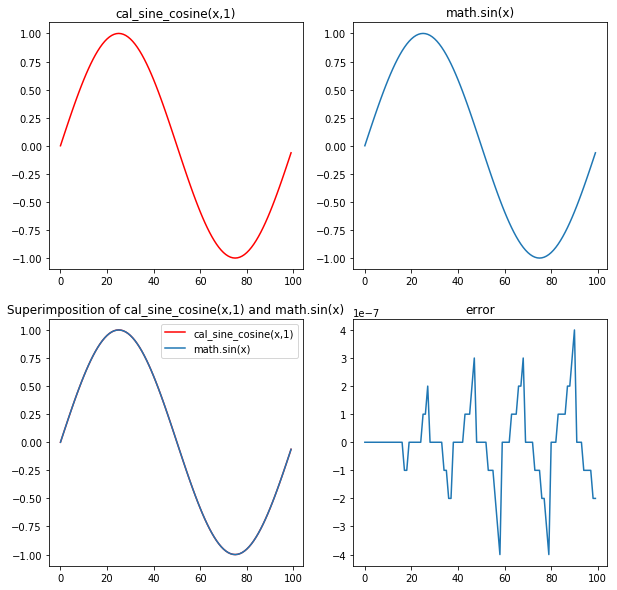

In [32]:
testing2(cal_sine_cosine3,1)

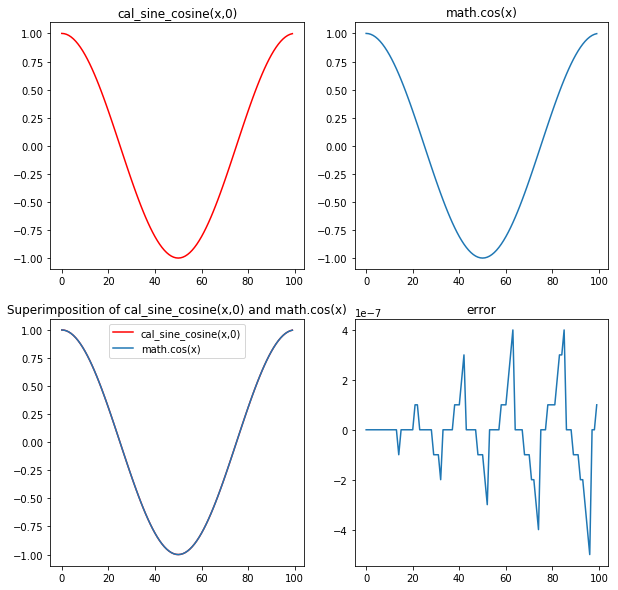

In [33]:
testing2(cal_sine_cosine3,0)

In [34]:
x = np.linspace(0, 2* np.pi  ,num = 100 , endpoint=False)
cosx = []
actualcosx = []
cosx_itr = []
sinx = []
actualsinx = []
sinx_itr = []
for i in x :
    tup = cal_sine_cosine3(i,0)
    cosx.append(tup[0])
    cosx_itr.append(tup[1])
    actualcosx.append(math.cos(i))
    tup = cal_sine_cosine3(i,1)
    sinx.append(tup[0])
    sinx_itr.append(tup[1])
    actualsinx.append(math.sin(i))  

We calculated cos(x), sin(x), math.cos(x), math.sin(x), the number of iterations required to calculate each of these values by function cal_sine_cosine(x,i). Lets take a look at visual representation of these values

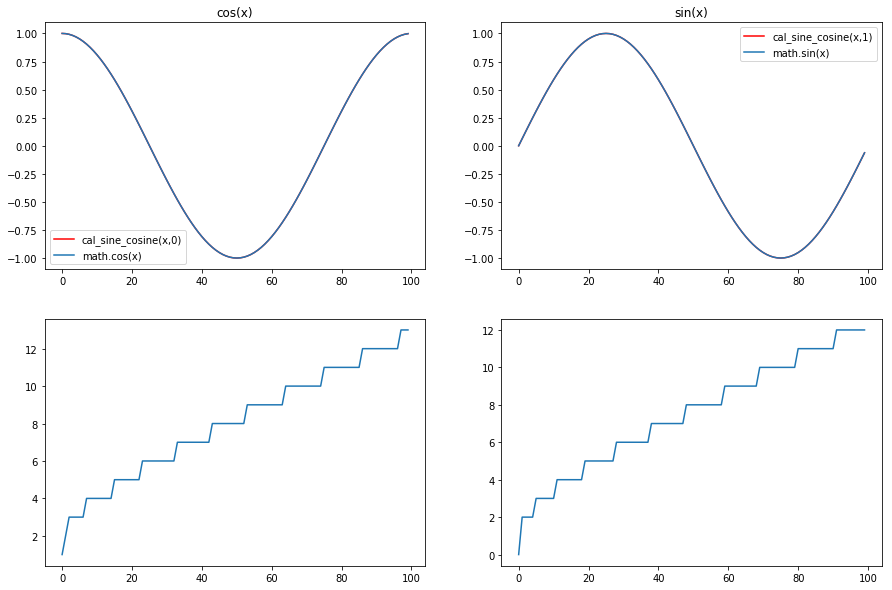

In [35]:
fig, ax = plt.subplots(2,2,figsize=(15,10)) 
ax[0][0].plot(cosx, color ='red')
ax[0][0].plot(actualcosx)
ax[0][0].set_title("cos(x)")
ax[0][0].legend(['cal_sine_cosine(x,0)', 'math.cos(x)'])
ax[0][1].plot(sinx, color = 'red')
ax[0][1].plot(actualsinx)
ax[0][1].set_title("sin(x)")
ax[0][1].legend(['cal_sine_cosine(x,1)', 'math.sin(x)'])
ax[1][0].plot(cosx_itr)
ax[1][1].plot(sinx_itr)

We can see that as the angles approaches 2pi the number of iterations increase. 
<br>Let us consider one of the lasts terms in our list of angles. At each iteration we will store the value of sum that is the value of cos(x) / sin(x) and plot it, then check these values for errors. 

Text(0,0.5,'Value')

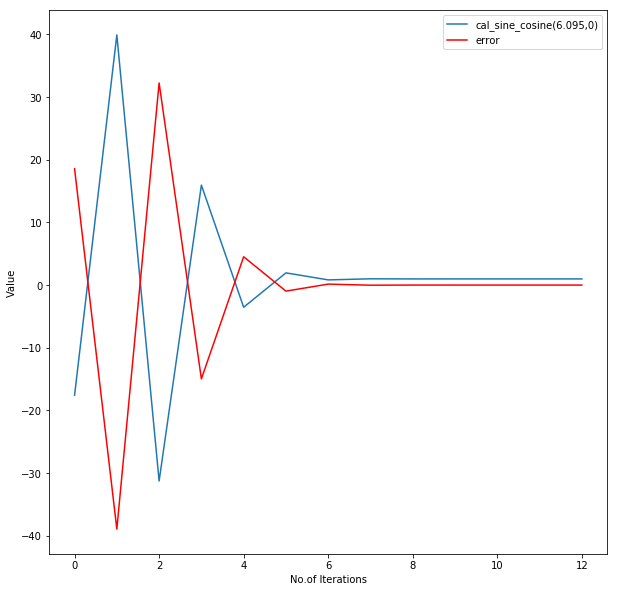

In [36]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
tup = cal_sine_cosine3(x[97],0)
ax.plot(tup[2])
ans = math.cos(x[97])
error = []
for i in tup[2] : 
    error.append(ans - i)
ax.plot(error, color = 'red')
ax.legend(['cal_sine_cosine('+str(round(x[97],3))+',0)', 'error'])
ax.set_xlabel("No.of Iterations")
ax.set_ylabel("Value")

***

Till now we have seen 4 functions that calculate sine and cosine values. Using %%timeit we also found out the computation time required by these functions. 
<br>Now lets take a look at the number of iterations.

Text(0,0.5,'Iterations')

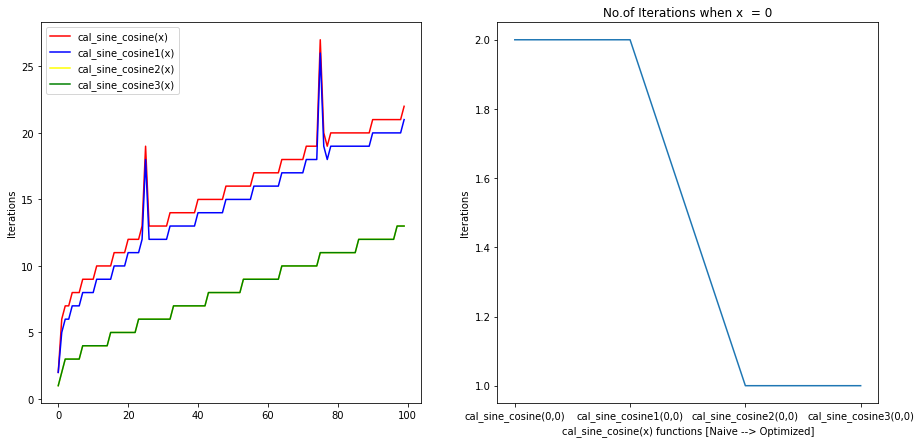

In [37]:
itr = []
itr1 = []
itr2 = []
itr3 = []
for i in x :
    itr.append(cal_sine_cosine(i,0)[1])
    itr1.append(cal_sine_cosine1(i,0)[1])
    itr2.append(cal_sine_cosine2(i,0)[1])
    itr3.append(cal_sine_cosine3(i,0)[1])

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].plot(itr,color = 'red')
ax[0].plot(itr1, color = 'blue')
ax[0].plot(itr2,color = 'yellow')
ax[0].plot(itr3, color  = 'green')
ax[0].legend(['cal_sine_cosine(x)','cal_sine_cosine1(x)','cal_sine_cosine2(x)','cal_sine_cosine3(x)'])
ax[0].set_ylabel("Iterations")

itr4 = []
itr4.append(cal_sine_cosine(0,0)[1])
itr4.append(cal_sine_cosine1(0,0)[1])
itr4.append(cal_sine_cosine2(0,0)[1])
itr4.append(cal_sine_cosine3(0,0)[1])
xaxis = ["cal_sine_cosine(0,0)","cal_sine_cosine1(0,0)","cal_sine_cosine2(0,0)","cal_sine_cosine3(0,0)"]
ax[1].plot(xaxis,itr4)
ax[1].set_title("No.of Iterations when x  = 0")
ax[1].set_xlabel("cal_sine_cosine(x) functions [Naive --> Optimized]")
ax[1].set_ylabel("Iterations")

The number of iterations have decreased with increased optimization. 
<br>The last two functions have the same no.of iterations that is why you can't see yellow - they overlap
<br>In the second graph at the right, we can see the number of iterations taken by each function to find cos(0)
<br>What if we set a precision limit to our very first naive implementation of calculating sine and cosine, how will the graph for number of iterations look?

In [38]:
def cal_sine_cosine4(x,i) :
    t1 = 1
    val = 0
    sign = -1
    n = 0
    while abs(t1) > 1e-5:
        n = n + 1
        sign  = -sign
        t1 = ((x**(i))/math.factorial(i))*sign
        val = val + t1
        i = i + 2
    return val, n

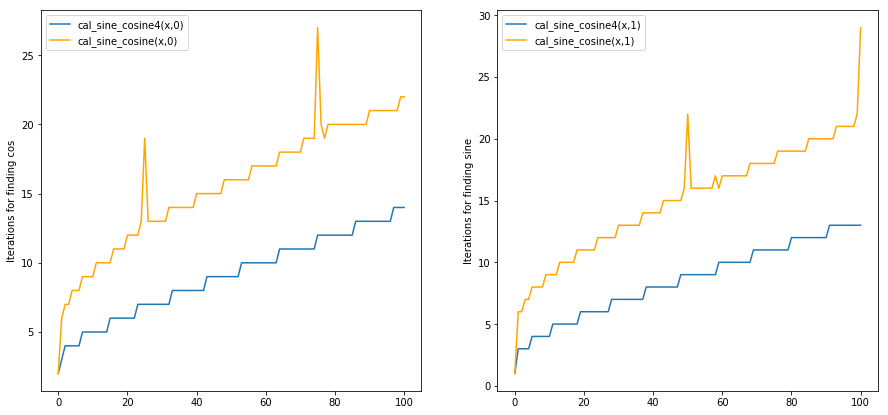

In [39]:
itr4 = []
itr41 = []
itr = []
itr1 = []
angle = np.linspace(0, 2* np.pi  ,num = 101 , endpoint=True)
for i in angle :
    itr4.append(cal_sine_cosine4(i,0)[1])
    itr41.append(cal_sine_cosine4(i,1)[1])
    itr.append(cal_sine_cosine(i,0)[1])
    itr1.append(cal_sine_cosine(i,1)[1])

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].plot(itr4)
ax[0].plot(itr, color = 'orange')
ax[0].set_ylabel("Iterations for finding cos")
ax[0].legend(['cal_sine_cosine4(x,0)','cal_sine_cosine(x,0)'])
ax[1].plot(itr41)
ax[1].plot(itr1, color = 'orange')
ax[1].set_ylabel("Iterations for finding sine")
ax[1].legend(['cal_sine_cosine4(x,1)','cal_sine_cosine(x,1)'])

The number of iterations are quite lower than the first naive implementation. The computation time required can significantly be reduced by just keeping a proper terminating condition, further optimization can be done to get an even smaller computation time.

***